In [ ]:
#Ensemble Top 3 models with weights based on performance

In [3]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.applications.efficientnet import preprocess_input as preprocess_efficientnet
from tensorflow.keras.applications.vgg19 import preprocess_input as preprocess_vgg19
from tensorflow.keras.applications.densenet import preprocess_input as preprocess_densenet



In [4]:
# Load the models
model1 = load_model("EfficinetB0_Brain1.keras")  # EfficientNetB0
model4 = load_model("VGG19_Brain.keras")         # VGG19
model5 = load_model("DenseNet121_Brain.keras")   # DenseNet121

# Directory path for test data
data_dir = "D:\\Brain\\Brain Tumor\\test"



In [5]:
# Define separate data generators for each model
datagen1 = ImageDataGenerator(preprocessing_function=preprocess_efficientnet)
datagen4 = ImageDataGenerator(preprocessing_function=preprocess_vgg19)
datagen5 = ImageDataGenerator(preprocessing_function=preprocess_densenet)

# Create generators
test_gen1 = datagen1.flow_from_directory(data_dir, target_size=(224, 224), class_mode='categorical', color_mode='rgb', batch_size=32, shuffle=False)
test_gen4 = datagen4.flow_from_directory(data_dir, target_size=(224, 224), class_mode='categorical', color_mode='rgb', batch_size=32, shuffle=False)
test_gen5 = datagen5.flow_from_directory(data_dir, target_size=(224, 224), class_mode='categorical', color_mode='rgb', batch_size=32, shuffle=False)



Found 1054 images belonging to 4 classes.
Found 1054 images belonging to 4 classes.
Found 1054 images belonging to 4 classes.


In [6]:
# Predict the labels on the test dataset with each model
predictions1 = model1.predict(test_gen1, steps=len(test_gen1))
predictions4 = model4.predict(test_gen4, steps=len(test_gen4))
predictions5 = model5.predict(test_gen5, steps=len(test_gen5))




33/33 [==============================] - 31s 887ms/step


In [9]:
# Define weights based on previous performance or misclassification rates
weights = np.array([0.5, 0.2, 0.3])  

# Calculate weighted sum of probabilities for soft voting
weighted_predictions = (predictions1 * weights[0] +
                        predictions4 * weights[1] +
                        predictions5 * weights[2])



In [10]:
# Convert weighted probabilities to final predicted classes
final_predicted_classes = np.argmax(weighted_predictions, axis=1)

# Get the true labels from one of the generators (assumed they all are the same)
true_classes = test_gen1.classes

# Compute the confusion matrix
cm = confusion_matrix(true_classes, final_predicted_classes)

# Define the class labels
class_labels = list(test_gen1.class_indices.keys())


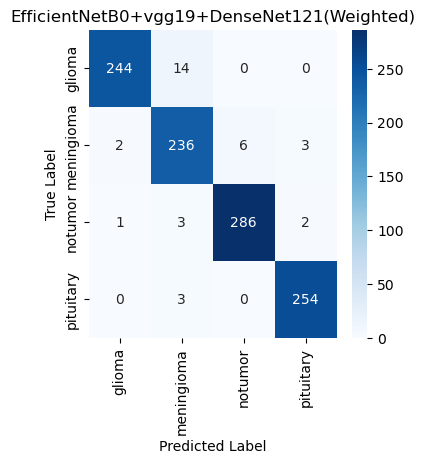

In [11]:
# Plot the confusion matrix
def plot_confusion_matrix(cm, class_names):
    plt.figure(figsize=(4, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.title('EfficientNetB0+vgg19+DenseNet121(Weighted)')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

# Call the function to plot the confusion matrix
plot_confusion_matrix(cm, class_labels)


In [12]:
from sklearn.metrics import accuracy_score, classification_report

# Assuming your existing code above this point

# Calculate the accuracy
accuracy = accuracy_score(true_classes, final_predicted_classes)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Print the classification report
report = classification_report(true_classes, final_predicted_classes, target_names=class_labels)
print("Classification Report:\n", report)



Accuracy: 96.77%
Classification Report:
               precision    recall  f1-score   support

      glioma       0.99      0.95      0.97       258
  meningioma       0.92      0.96      0.94       247
     notumor       0.98      0.98      0.98       292
   pituitary       0.98      0.99      0.98       257

    accuracy                           0.97      1054
   macro avg       0.97      0.97      0.97      1054
weighted avg       0.97      0.97      0.97      1054



In [ ]:
#Ensemblee top 3 model with hard voting

In [14]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.efficientnet import preprocess_input as preprocess_efficientnet
from tensorflow.keras.applications.vgg19 import preprocess_input as preprocess_vgg19
from tensorflow.keras.applications.densenet import preprocess_input as preprocess_densenet
import numpy as np
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt



In [15]:
# Load the models
model1 = load_model("EfficinetB0_Brain1.keras")  # EfficientNetB0
model2 = load_model("VGG19_Brain.keras")         # VGG19
model3 = load_model("DenseNet121_Brain.keras")   # DenseNet121



In [16]:
# Directory path for test data
data_dir = "D:\\Brain\\Brain Tumor\\test"



In [17]:
# Define data generators for each model
datagen1 = ImageDataGenerator(preprocessing_function=preprocess_efficientnet)
datagen2 = ImageDataGenerator(preprocessing_function=preprocess_vgg19)
datagen3 = ImageDataGenerator(preprocessing_function=preprocess_densenet)

# Create generators
test_gen1 = datagen1.flow_from_directory(data_dir, target_size=(224, 224), class_mode='categorical', color_mode='rgb', batch_size=32, shuffle=False)
test_gen2 = datagen2.flow_from_directory(data_dir, target_size=(224, 224), class_mode='categorical', color_mode='rgb', batch_size=32, shuffle=False)
test_gen3 = datagen3.flow_from_directory(data_dir, target_size=(224, 224), class_mode='categorical', color_mode='rgb', batch_size=32, shuffle=False)



Found 1054 images belonging to 4 classes.
Found 1054 images belonging to 4 classes.
Found 1054 images belonging to 4 classes.


In [18]:
# Predict the labels on the test dataset with each model
predictions1 = model1.predict(test_gen1, steps=len(test_gen1))
predictions2 = model2.predict(test_gen2, steps=len(test_gen2))
predictions3 = model3.predict(test_gen3, steps=len(test_gen3))

# Convert probabilities to class labels
predicted_classes1 = np.argmax(predictions1, axis=1)
predicted_classes2 = np.argmax(predictions2, axis=1)
predicted_classes3 = np.argmax(predictions3, axis=1)



33/33 [==============================] - 31s 896ms/step


In [19]:
# Ensemble predictions using hard voting
final_predictions = np.array([
    np.bincount([predicted_classes1[i], predicted_classes2[i], predicted_classes3[i]], minlength=len(test_gen1.class_indices)).argmax() 
    for i in range(len(predicted_classes1))
])



In [20]:
# Get the true labels from one of the generators (assumed they all are the same)
true_classes = test_gen1.classes

# Compute the confusion matrix
cm = confusion_matrix(true_classes, final_predictions)

# Define the class labels
class_labels = list(test_gen1.class_indices.keys())



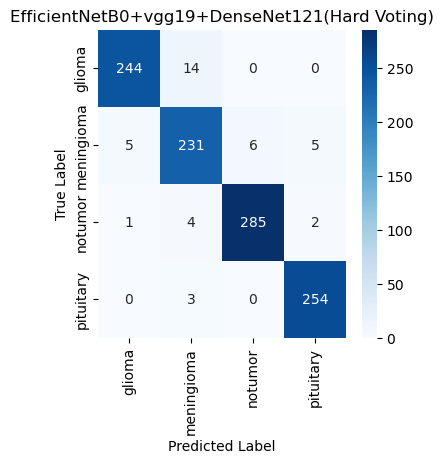

Accuracy: 96.20%
Classification Report:
               precision    recall  f1-score   support

      glioma       0.98      0.95      0.96       258
  meningioma       0.92      0.94      0.93       247
     notumor       0.98      0.98      0.98       292
   pituitary       0.97      0.99      0.98       257

    accuracy                           0.96      1054
   macro avg       0.96      0.96      0.96      1054
weighted avg       0.96      0.96      0.96      1054



In [21]:
# Function to plot the confusion matrix
def plot_confusion_matrix(cm, class_names):
    plt.figure(figsize=(4, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.title('EfficientNetB0+vgg19+DenseNet121(Hard Voting)')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

# Call the function to plot the confusion matrix
plot_confusion_matrix(cm, class_labels)

# Calculate the accuracy
accuracy = accuracy_score(true_classes, final_predictions)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Print the classification report
report = classification_report(true_classes, final_predictions, target_names=class_labels)
print("Classification Report:\n", report)
